<a href="https://colab.research.google.com/github/Sarfaraz-Ali/ComputerVision/blob/main/Apple%20Frequency(Object%20Detection)/AppleFreq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the environment

In [ ]:
# !git clone https://github.com/ultralytics/yolov5

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
cd /content/drive/MyDrive/Pep_project/yolov5

/content/drive/MyDrive/Pep_project/yolov5


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install -q roboflow

In [3]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [ ]:
%cd ..

/content/drive/MyDrive/Pep_project


In [32]:
pwd

'/content/drive/MyDrive/Pep_project/yolov5'

In [5]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
from roboflow import Roboflow

In [ ]:
# rf = Roboflow(api_key="kBqAb6q1IJtDPIod5sjp")
# project = rf.workspace("rahul-kumar-tmms8").project("damage_detect-ntnoi")
# dataset = project.version(1).download("yolov5")

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="kBqAb6q1IJtDPIod5sjp")
# project = rf.workspace("shreshtha-gaur").project("defect-l5gny")
# dataset = project.version(1).download("yolov5")

In [ ]:
cd yolov5

/content/drive/MyDrive/Pep_project/yolov5


In [ ]:
img = Image.open("/content/damage_detect-1/images/train/1630149513068_jpg.rf.53155cfc621f73887cdab484a192d44f.jpg")

In [ ]:
print(img.width,img.height)

416 416


# Training

In [ ]:
!python train.py --img 416 --batch 8 --epochs 50 --data /content/drive/MyDrive/Pep_project/damage_detect-1/data.yaml --weights /content/drive/MyDrive/Pep_project/yolov5/runs/train/exp4/weights/best.pt --cache

In [ ]:
dataset.location

# Creating directories of dataset 

In [ ]:
# train_annotations, val_annotations = train_test_split( annotations, test_size = 0.2, random_state = 1)
# val_annotations, test_annotations = train_test_split( val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
# Read images and annotations
images = [os.path.join('/content/damage_detect-1/train/images', x) for x in os.listdir('/content/damage_detect-1/train/images')]
annotations = [os.path.join('/content/damage_detect-1/train/labels', x) for x in os.listdir('/content/damage_detect-1/train/labels') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
type(images)

list

In [ ]:
len(train_images)

1852

In [ ]:
len(annotations)

2316

In [ ]:
annotations[:5]

In [ ]:
images[:5]

In [ ]:
!mkdir images/train images/val images/test labels/train labels/val labels/test

In [ ]:
pwd

'/content/damage_detect-1'

In [ ]:
cd damage_detect-1/

/content/damage_detect-1


In [ ]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False


In [ ]:

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'labels/train/')
move_files_to_folder(val_annotations, 'labels/val/')
move_files_to_folder(test_annotations, 'labels/test/')

In [ ]:
pwd

'/content/yolov5'

In [ ]:
%cd ..

/content


In [ ]:
# !wget -P data/ https://gist.githubusercontent.com/ayooshkathuria/bcf7e3c929cbad445439c506dba6198d/raw/f437350c0c17c4eaa1e8657a5cb836e65d8aa08a/road_sign_data.yaml

In [ ]:
# rf = Roboflow(api_key="kBqAb6q1IJtDPIod5sjp")
# project = rf.workspace("streamlit").project("streamlit-logos")
# dataset = project.version(1).download("yolov5")

# Detection on test samples

In [ ]:
!python detect.py --source /content/drive/MyDrive/Pep_project/damage_detect-1/hdTrim.mp4 --weights /content/drive/MyDrive/Pep_project/yolov5/runs/train/exp/weights/best.pt --conf 0.25 --name yolo_road_det

In [ ]:
detections_dir = "runs/detect/yolo_road_det2/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]


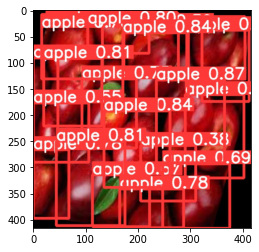

In [ ]:
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

#Val.py on model after every 50 epochs

In [ ]:
!python val.py --weights /content/drive/MyDrive/Pep_project/yolov5/runs/train/exp/weights/best.pt --data /content/drive/MyDrive/Pep_project/damage_detect-1/data.yaml --task test --name yolo_det

val: data=/content/damage_detect-1/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
test: Scanning '/content/damage_detect-1/labels/test.cache' images and labels... 232 found, 0 missing, 0 empty, 0 corrupt: 100% 232/232 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 8/8 [00:20<00:00,  2.52s/it]
                 all        232       1289      0.867      0.861       0.91      0.617
               apple        232        983      0.848      0.928      0.9

In [36]:
!python val.py --weights /content/drive/MyDrive/Pep_project/yolov5/runs/train/exp3/weights/best.pt --data /content/drive/MyDrive/Pep_project/damage_detect-1/data.yaml --task test --name yolo_detect

val: data=/content/drive/MyDrive/Pep_project/damage_detect-1/data.yaml, weights=['/content/drive/MyDrive/Pep_project/yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_detect, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86180143 parameters, 0 gradients
test: Scanning '/content/drive/MyDrive/Pep_project/damage_detect-1/labels/test' images and labels...232 found, 0 missing, 0 empty, 0 corrupt: 100% 232/232 [03:18<00:00,  1.17it/s]
test: New cache created: /content/drive/MyDrive/Pep_project/damage_detect-1/labels/test.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 8/8 [00:17<00:00,  2.20s/i

In [38]:
!python val.py --weights /content/drive/MyDrive/Pep_project/yolov5/runs/train/exp4/weights/best.pt --data /content/drive/MyDrive/Pep_project/damage_detect-1/data.yaml --task test --name yolo_detect

val: data=/content/drive/MyDrive/Pep_project/damage_detect-1/data.yaml, weights=['/content/drive/MyDrive/Pep_project/yolov5/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_detect, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86180143 parameters, 0 gradients
test: Scanning '/content/drive/MyDrive/Pep_project/damage_detect-1/labels/test.cache' images and labels... 232 found, 0 missing, 0 empty, 0 corrupt: 100% 232/232 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 8/8 [00:16<00:00,  2.11s/it]
                 all        232       1289      0.921      0.873      0.916      0.653
     

In [40]:
!python val.py --weights /content/drive/MyDrive/Pep_project/yolov5/runs/train/exp5/weights/best.pt --data /content/drive/MyDrive/Pep_project/damage_detect-1/data.yaml --task test --name yolo_detect

val: data=/content/drive/MyDrive/Pep_project/damage_detect-1/data.yaml, weights=['/content/drive/MyDrive/Pep_project/yolov5/runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_detect, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86180143 parameters, 0 gradients
test: Scanning '/content/drive/MyDrive/Pep_project/damage_detect-1/labels/test.cache' images and labels... 232 found, 0 missing, 0 empty, 0 corrupt: 100% 232/232 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 8/8 [00:17<00:00,  2.15s/it]
                 all        232       1289      0.921      0.872      0.916      0.655
     